# Kalman Filtering

In [11]:
import Simulator
import Observation
import Statistics
import KalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [12]:
timestamp = "2021_08_26-15_08_53"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [13]:
statistics = Statistics.Statistics(simulator)

Please remember to set priors!


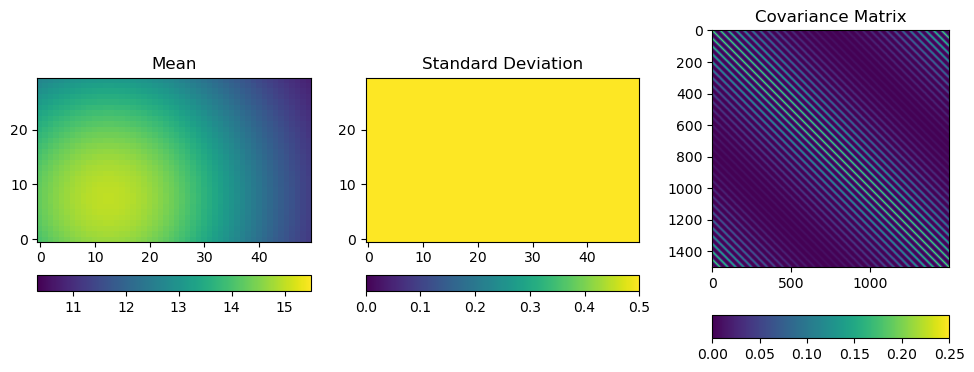

In [14]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [15]:
obs_timestamp = "2021_08_26-15_09_09"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


## Kalman filtering

Updating/conditioning the distributions at every observation time

In [16]:
# Plots for the paper
import numpy as np
kf_states = np.zeros((11,grid.N_x))
kf_scales = np.zeros((11,grid.N_x))

kf_states[0] = statistics.mean
kf_scales[0] = statistics.stddev

0


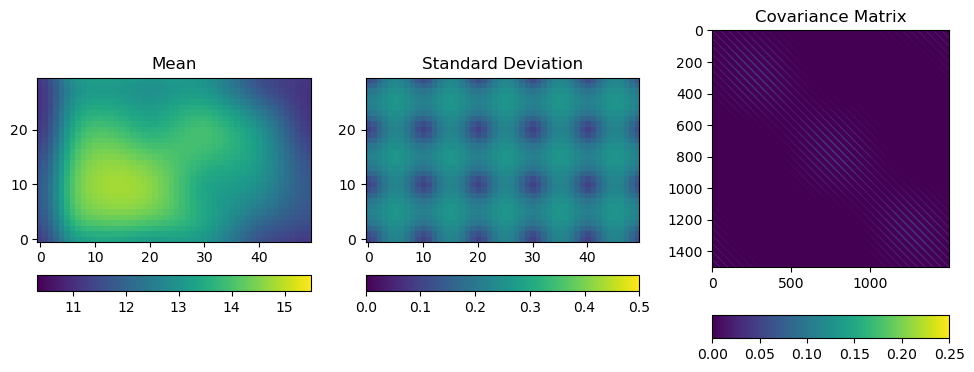

1


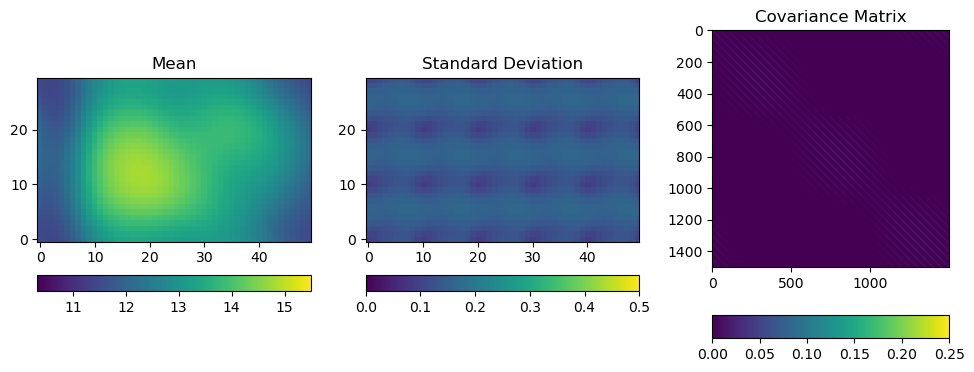

2


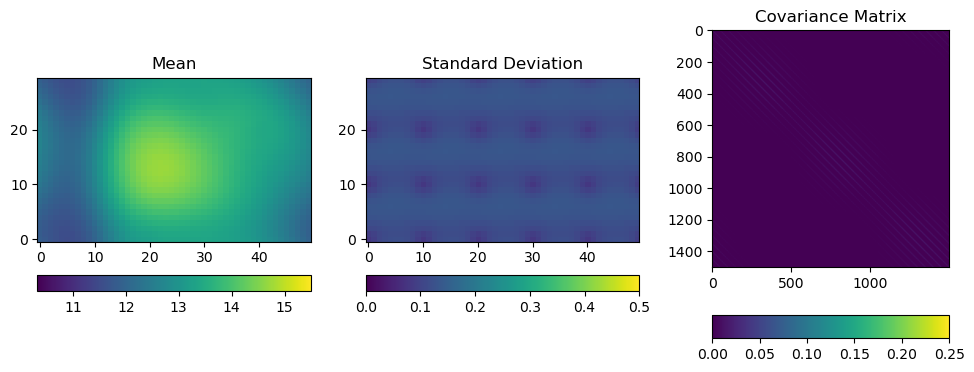

3


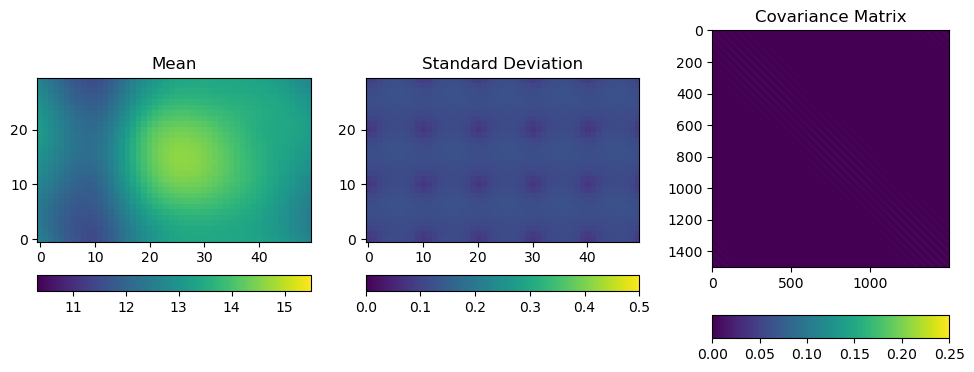

4


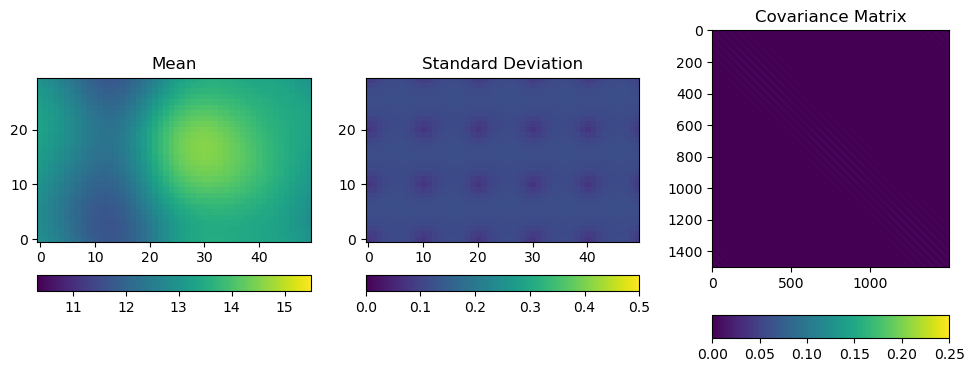

5


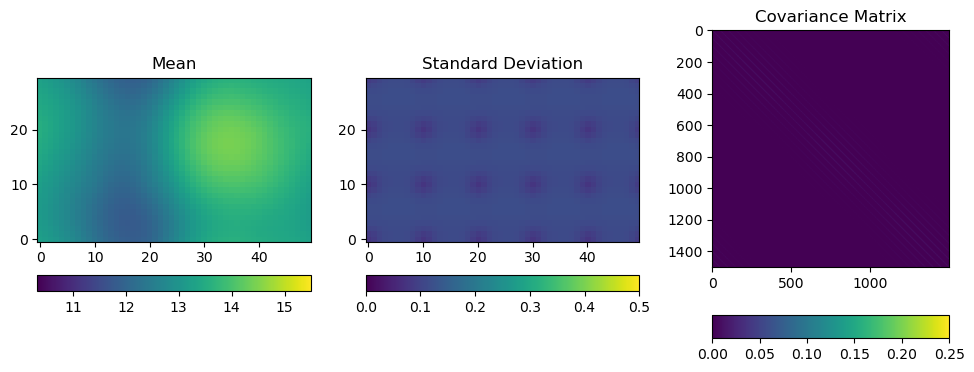

6


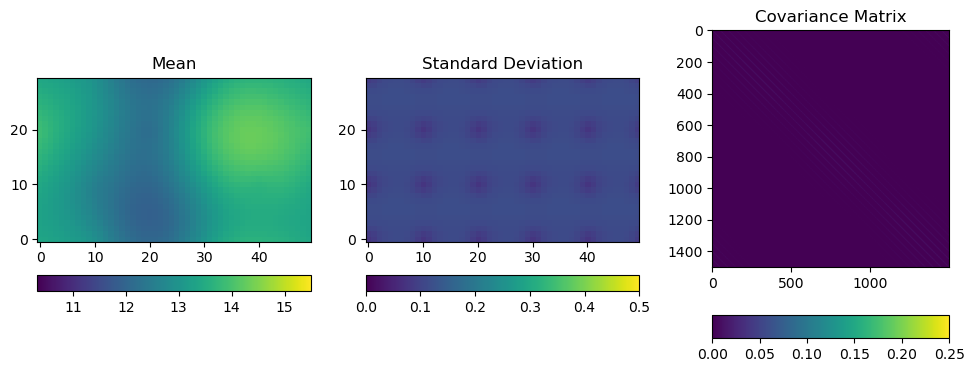

7


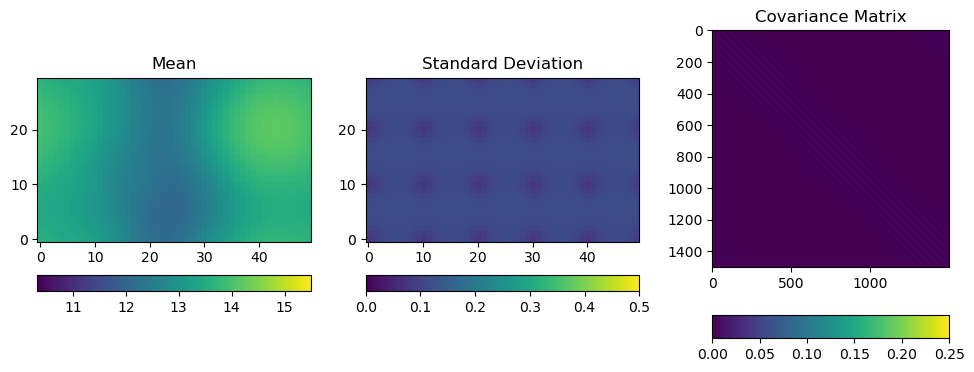

8


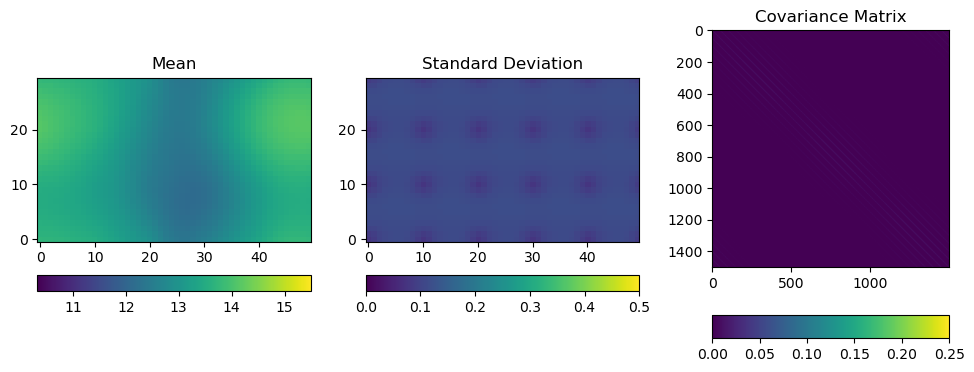

9


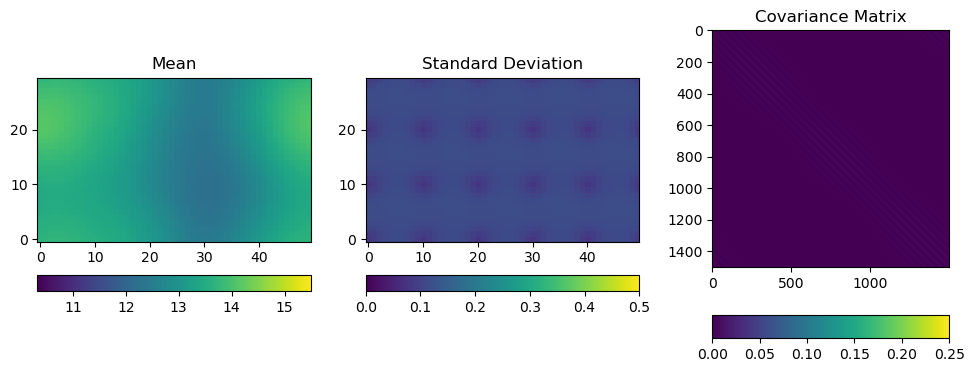

In [17]:
kalmanFilter = KalmanFilter.Kalman(statistics, observation)

for t in range(observation.N_obs):
    print(t)
    statistics.propagate(25)
    kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[t])
    statistics.plot()

    kf_states[t+1] = statistics.mean
    kf_scales[t+1] = statistics.stddev

## Plots for paper

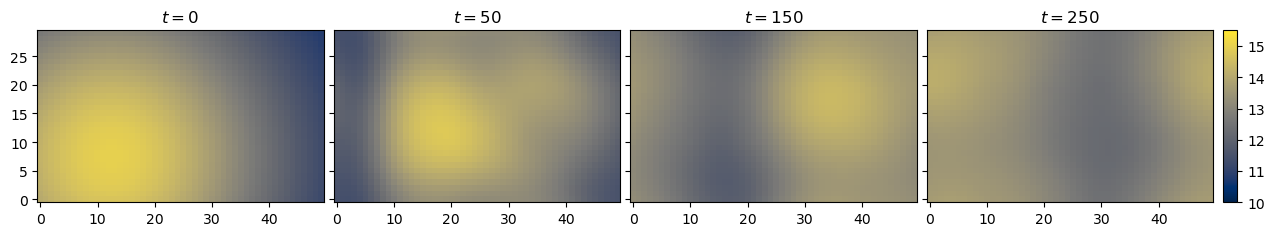

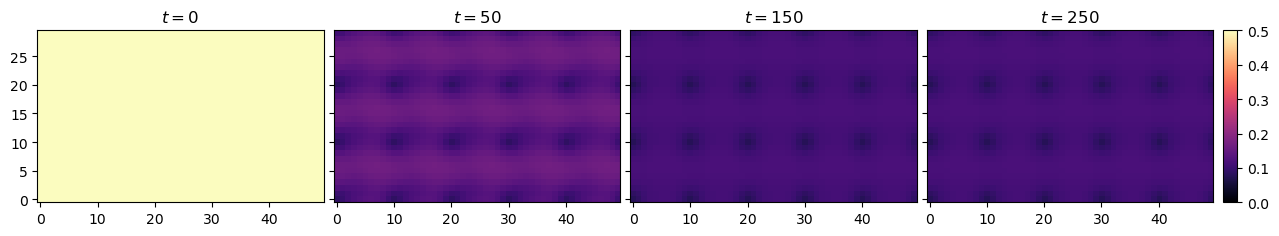

In [19]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(figsize=(12,4))

axs = AxesGrid(fig, (0.0,0.0,1.0,1.0), nrows_ncols=(1,4), axes_pad=0.1,
    cbar_mode="single", cbar_location="right", cbar_pad=0.1)

fig0 = axs[0].imshow(np.reshape(kf_states[0],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[0].set_title("$t=0$")

fig1 = axs[1].imshow(np.reshape(kf_states[2],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[1].set_title("$t=50$")

fig2 = axs[2].imshow(np.reshape(kf_states[6],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[2].set_title("$t=150$")

fig3 = axs[3].imshow(np.reshape(kf_states[10],(grid.ny, grid.nx)), origin="lower", vmin=10, vmax=15.5, cmap="cividis")
axs[3].set_title("$t=250$")

cbar = axs[0].cax.colorbar(fig0)

plt.show()


fig = plt.figure(figsize=(12,4))

axs = AxesGrid(fig, (0.0,0.0,1.0,1.0), nrows_ncols=(1,4), axes_pad=0.1,
    cbar_mode="single", cbar_location="right", cbar_pad=0.1)

fig0 = axs[0].imshow(np.reshape(kf_scales[0],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[0].set_title("$t=0$")

fig1 = axs[1].imshow(np.reshape(kf_scales[2],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[1].set_title("$t=50$")

fig2 = axs[2].imshow(np.reshape(kf_scales[6],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[2].set_title("$t=150$")

fig3 = axs[3].imshow(np.reshape(kf_scales[10],(grid.ny, grid.nx)), origin="lower", vmin=0.0, vmax=0.5, cmap="magma")
axs[3].set_title("$t=250$")

cbar = axs[0].cax.colorbar(fig0)

plt.show()